In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [3]:
# Natural Language Processing libraries
import nltk
import re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
df = pd.read_csv("IMDB Dataset.csv")

In [5]:
df.head(10)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
df.tail(10)


,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
df.shape

(50000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
#distribution of sentiments
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [11]:
#distirbution in terms of percentage
df["sentiment"].value_counts(normalize='True')

sentiment
positive    0.5
negative    0.5
Name: proportion, dtype: float64

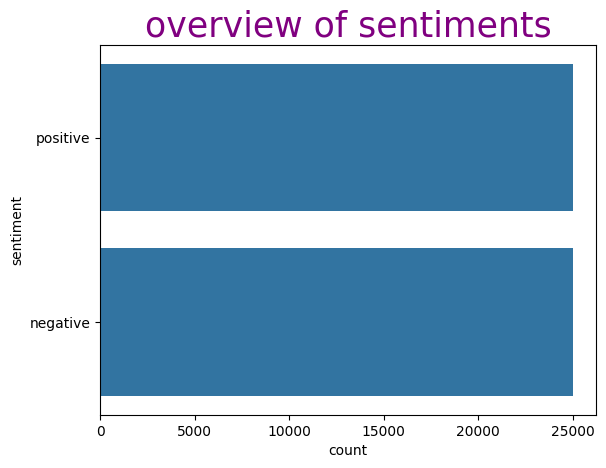

In [12]:
sns.countplot(df.sentiment)
plt.title('overview of sentiments', fontsize = 25, color = 'purple')
plt.show()

In [13]:
# NLTK resources
#used to tokenise, stopwords, and understanding meanings of words,also assigns grammatical parts to the text tokens such as noun, verbs etc
nltk.download(['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger'])

print("NLTK resources downloaded successfully!")

[nltk_data] Downloading package punkt to C:\Users\Atharva
[nltk_data]     Prabhu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Atharva
[nltk_data]     Prabhu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Atharva
[nltk_data]     Prabhu\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Atharva Prabhu\AppData\Roaming\nltk_data...


NLTK resources downloaded successfully!


[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [14]:
# Text Preprocessing
def preprocess_reviews(df):

    # Initialize stop words and lemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def clean_text(text):
        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize
        tokens = text.split()

        # Remove stopwords and lemmatize
        cleaned_tokens = [
            lemmatizer.lemmatize(token)
            for token in tokens
            if token not in stop_words
        ]

        return ' '.join(cleaned_tokens)

    # Apply preprocessing
    df['clean_review'] = df['review'].apply(clean_text)


    return df

# calling the function
df = preprocess_reviews(df)

In [15]:
#stop words are removed etc
df.head(10)

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
5,"Probably my all-time favorite movie, a story o...",positive,probably alltime favorite movie story selfless...
6,I sure would like to see a resurrection of a u...,positive,sure would like see resurrection dated seahunt...
7,"This show was an amazing, fresh & innovative i...",negative,show amazing fresh innovative idea first aired...
8,Encouraged by the positive comments about this...,negative,encouraged positive comment film looking forwa...
9,If you like original gut wrenching laughter yo...,positive,like original gut wrenching laughter like movi...


In [16]:
#Prepare Data for Machine Learning

def prepare_ml_data(df, test_size=0.2):
    # Encode labels
    label_encoder = LabelEncoder()
    df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        df['clean_review'],
        df['sentiment_encoded'],
        test_size=test_size,
        random_state=42
    )

    print("Data Preparation Complete:")
    print(f"Training Samples: {len(X_train)}")
    print(f"Testing Samples: {len(X_test)}")

    return X_train, X_test, y_train, y_test, label_encoder

X_train, X_test, y_train, y_test, label_encoder = prepare_ml_data(df)

Data Preparation Complete:
Training Samples: 40000
Testing Samples: 10000


In [17]:
# Cell 6: Train Models
def train_sentiment_models(X_train, X_test, y_train, y_test):
    # Define models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Naive Bayes': MultinomialNB(),
        'Support Vector Machine': LinearSVC(max_iter=10000)
    }

    # Store results
    results = {}

    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=5000)),
            ('classifier', model)
        ])

        # Train model
        pipeline.fit(X_train, y_train)

        # Predict
        y_pred = pipeline.predict(X_test)

        # Store results
        results[name] = {
            'model': pipeline,
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'accuracy': accuracy_score(y_test, y_pred)
        }

        # Print results
        print(f"\n{name} Performance:")
        print(results[name]['classification_report'])

    return results

# calling the function
model_results = train_sentiment_models(X_train, X_test, y_train, y_test)


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.

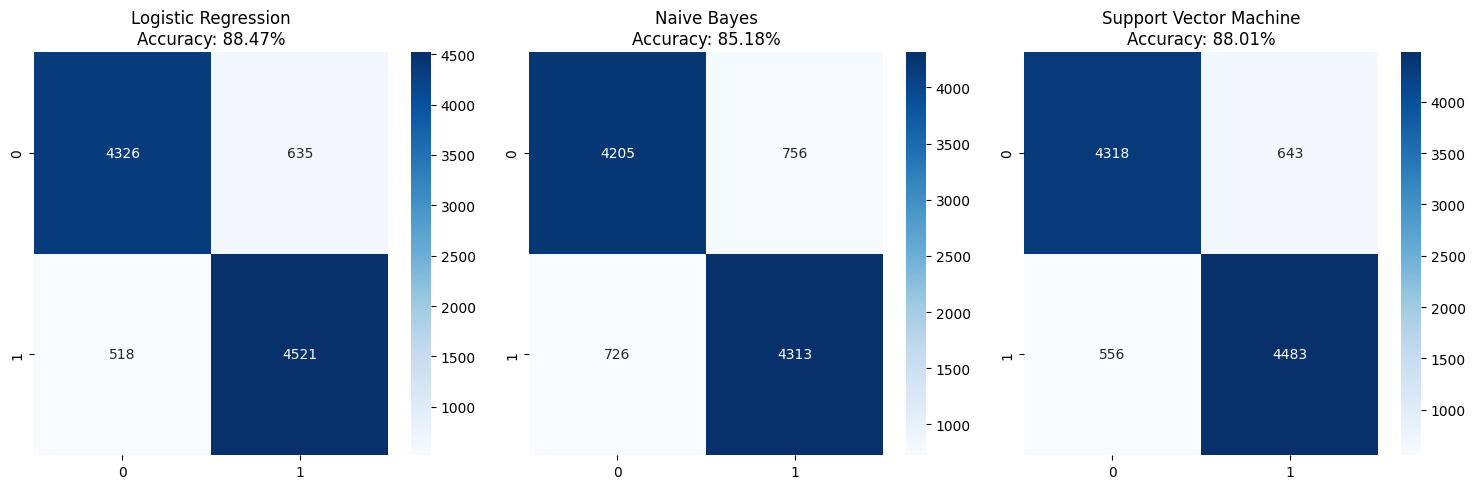

In [18]:
# Visualize Results
def visualize_model_performance(results):

    plt.figure(figsize=(15, 5))

    for i, (model_name, model_data) in enumerate(results.items(), 1):
        plt.subplot(1, 3, i)
        sns.heatmap(
            model_data['confusion_matrix'],
            annot=True,
            fmt='d',
            cmap='Blues'
        )
        plt.title(f'{model_name}\nAccuracy: {model_data["accuracy"]:.2%}')

    plt.tight_layout()
    plt.show()

# calling the function
visualize_model_performance(model_results)

In [19]:
# Cross-Validation
# Data processing and ML libraries
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold
)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

def perform_cross_validation(df, cv=5):

    # Prepare models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Naive Bayes': MultinomialNB(),
        'Support Vector Machine': LinearSVC(max_iter=10000)
    }

    cv_results = {}

    # Stratified K-Fold
    stratified_cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=5000)),
            ('classifier', model)
        ])

        # Perform cross-validation
        scores = cross_val_score(
            pipeline,
            df['clean_review'],
            df['sentiment_encoded'],
            cv=stratified_cv,
            scoring='accuracy'
        )

        # Store results
        cv_results[name] = {
            'mean_accuracy': scores.mean(),
            'std_accuracy': scores.std(),
            'scores': scores
        }

        # Print results
        print(f"\n{name} Cross-Validation:")
        print(f"Mean Accuracy: {scores.mean():.2%}")
        print(f"Standard Deviation: {scores.std():.2%}")

    return cv_results

cross_validation_results = perform_cross_validation(df)


Logistic Regression Cross-Validation:
Mean Accuracy: 88.60%
Standard Deviation: 0.18%

Naive Bayes Cross-Validation:
Mean Accuracy: 85.27%
Standard Deviation: 0.35%

Support Vector Machine Cross-Validation:
Mean Accuracy: 87.96%
Standard Deviation: 0.14%


In [20]:
# Sentiment Prediction
def predict_sentiment(text, best_model, label_encoder):

    # Preprocess text (use the same preprocessing as in Cell 4)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Clean text
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    cleaned_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words
    ]
    cleaned_review = ' '.join(cleaned_tokens)

    # Predict
    prediction = best_model.predict([cleaned_review])[0]

    return label_encoder.inverse_transform([prediction])[0]

# Predict Sentiment for a Sample Review
# Select the best model
# Predict Sentiment for a Sample Review
# Select the best model
best_model_name = max(model_results, key=lambda x: model_results[x]['accuracy'])
best_model = model_results[best_model_name]['model']


In [21]:
# Sample reviews
sample_reviews = [
    "This movie was absolutely fantastic and incredibly entertaining!",
    "The film was terrible and a complete waste of time.",
]

# Predict and print sentiments
print("\nSentiment Predictions:")
for review in sample_reviews:
    predicted_sentiment = predict_sentiment(review, best_model, label_encoder)
    print(f"\nReview: {review}")
    print(f"Predicted Sentiment: {predicted_sentiment}")


Sentiment Predictions:

Review: This movie was absolutely fantastic and incredibly entertaining!
Predicted Sentiment: positive

Review: The film was terrible and a complete waste of time.
Predicted Sentiment: negative


In [22]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

# Load your trained model and other necessary objects
# Replace 'best_model.pkl' and 'label_encoder.pkl' with your actual file names
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Preprocessing function
def preprocess_reviews(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    cleaned_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words
    ]
    cleaned_review = ' '.join(cleaned_tokens)
    return cleaned_review

# Sentiment prediction function
def predict_sentiment(text, model, label_encoder):
    prediction = model.predict([text])[0]
    return label_encoder.inverse_transform([prediction])[0]

# Streamlit UI
st.title("Movie Review Sentiment Analysis")

user_input = st.text_area("Enter your movie review:")

if st.button("Predict Sentiment"):
    if user_input:
        cleaned_review = preprocess_reviews(user_input)
        prediction = predict_sentiment(cleaned_review, best_model, label_encoder)
        st.write(f"Predicted Sentiment: **{prediction}**")
    else:
        st.warning("Please enter a movie review.")

2025-04-21 05:39:42.628 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 05:39:43.064 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-21 05:39:43.073 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 05:39:43.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 05:39:43.087 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 05:39:43.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 05:39:43.093 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 05:39:43.096 Session state does not 

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠙⠹⠸⠼⠴⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://grumpy-coats-wonder.loca.lt
